In [131]:
#https://colab.research.google.com/github/ml6team/quick-tips/blob/main/nlp/2021_04_22_shap_for_huggingface_transformers/explainable_transformers_using_shap.ipynb#scrollTo=7XgsySD-u_rN

import shap
import transformers

from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)

import os
import pandas as pd
import numpy as np
import helpers

from sklearn.model_selection import train_test_split


In [87]:
import shap
import copy
from lightgbm.sklearn import LGBMClassifier
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y=True)
lgbm = LGBMClassifier()
lgbm.fit(X,y)

print(X.shape)

explainer = shap.TreeExplainer(lgbm)
shap_values1 = explainer(X)
shap_values2 = copy.deepcopy(shap_values1)
shap_values2.values = shap_values2.values[:,:,1]
shap_values2.base_values = shap_values2.base_values[:,1]

print(shap_values2.shape)
#shap.plots.beeswarm(shap_values2)

(569, 30)
(569, 30)


In [98]:
shap_values2


.values =
array([[-4.66983307e-02,  5.81342397e-01,  7.00939418e-03, ...,
        -2.98188416e+00, -3.81628343e-02, -7.97470537e-02],
       [-8.62551076e-02,  1.06846314e-01,  1.72025637e-02, ...,
        -3.09844953e+00, -4.58788880e-03,  5.96285990e-04],
       [-5.82962321e-02, -6.74619737e-02,  1.47324541e-02, ...,
        -2.57422303e+00, -5.06875636e-02,  1.78831033e-02],
       ...,
       [-2.02068003e-01, -1.11216148e+00,  2.04461365e-02, ...,
        -1.19701466e-01,  2.20713270e-01,  1.55077963e-02],
       [-5.27358927e-02, -4.79744466e-01,  1.36921012e-02, ...,
        -2.33296178e+00, -5.28907915e-02, -6.30719605e-02],
       [ 2.49106661e-02, -7.03029770e-01, -1.68098889e-02, ...,
         1.11903399e+00, -1.26114172e-02,  2.71178533e-02]])

.base_values =
array([2.47512052, 2.47512052, 2.47512052, 2.47512052, 2.47512052,
       2.47512052, 2.47512052, 2.47512052, 2.47512052, 2.47512052,
       2.47512052, 2.47512052, 2.47512052, 2.47512052, 2.47512052,
       2.4751205

In [132]:
df = pd.read_csv('./data/cub.csv', index_col=0)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

In [133]:
shap_df = df_test[df_test['species'] == 'yeasts288c']

In [134]:
import helpers

shap_df = helpers.add_codons_to_df(shap_df, 'Sequence')

In [64]:
#lengths = [len(seq) for seq in shap_df['Sequence']]
lengths = [len(seq.split(' ')) for seq in shap_df['codons_cleaned']]

In [23]:
lengths

[99, 99]

In [135]:
lengths = [len(seq.split(' ')) for seq in shap_df['codons_cleaned']]
shap_df['lengths'] = lengths

In [136]:
shap_df['lengths'].value_counts()

438     7
386     6
216     6
156     5
376     5
       ..
1047    1
791     1
204     1
1226    1
783     1
Name: lengths, Length: 655, dtype: int64

In [143]:
shap_df.loc[shap_df['lengths'] < 128, 'lengths'].value_counts()

121    4
102    4
114    4
112    4
111    4
110    4
109    3
123    3
95     2
99     2
101    2
105    2
86     1
43     1
94     1
74     1
122    1
83     1
61     1
66     1
116    1
80     1
69     1
120    1
117    1
98     1
125    1
81     1
106    1
97     1
127    1
39     1
64     1
100    1
126    1
89     1
124    1
49     1
96     1
63     1
90     1
Name: lengths, dtype: int64

In [144]:
shap_df = shap_df[shap_df['lengths'] < 128]

In [145]:
shap_df

,GeneName,median_exp,Sequence,species,mlphi_est,CAI,codons_cleaned,lengths
1346,ISD11,355.0,ATGCCTGGATTTACAGCTCCAACAAGAAGGCAGGTGTTGTCTTTAT...,yeasts288c,0.184648,0.797534,ATG CCT GGA TTT ACA GCT CCA ACA AGA AGG CAG GT...,95
3945,MFA2,3452.0,ATGCAACCGATCACCACTGCTTCCACACAAGCCACTCAGAAGGATA...,yeasts288c,0.211565,0.768126,ATG CAA CCG ATC ACC ACT GCT TCC ACA CAA GCC AC...,39
4872,ATP15,681.0,ATGTCTGCCTGGAGGAAAGCTGGTATATCATATGCTGCATATTTGA...,yeasts288c,0.125614,0.725466,ATG TCT GCC TGG AGG AAA GCT GGT ATA TCA TAT GC...,63
4137,EGO4,113.0,ATGAAGTCAAGTATTCCAATCACCGAAGTATTGCCAAGAGCAGTGG...,yeasts288c,0.152844,0.758880,ATG AAG TCA AGT ATT CCA ATC ACC GAA GTA TTG CC...,99
3342,CIS1,17.0,ATGCAATCGATCAGTAATTGTCCCATCGGGTTAGTTTCAAAAAACA...,yeasts288c,0.097767,0.706038,ATG CAA TCG ATC AGT AAT TGT CCC ATC GGG TTA GT...,102
...,...,...,...,...,...,...,...,...
4853,RPL36B,27.0,ATGGCTGTCAAGACTGGTATCGCTATTGGTTTGAACAAGGGTAAGA...,yeasts288c,0.756463,0.719319,ATG GCT GTC AAG ACT GGT ATC GCT ATT GGT TTG AA...,101
2673,EAF6,172.0,ATGACTGATGAGCTGAAAAGTTATGAAGCATTGAAAGCGGAACTAA...,yeasts288c,0.093698,0.718921,ATG ACT GAT GAG CTG AAA AGT TAT GAA GCA TTG AA...,114
1424,RPS26B,2248.0,ATGCCAAAAAAGAGAGCTTCCAACGGTAGAAACAAGAAGGGTAGAG...,yeasts288c,0.625780,0.801101,ATG CCA AAA AAG AGA GCT TCC AAC GGT AGA AAC AA...,120
832,PET100,140.0,ATGGGTCTATTTAATAACTTCAAGTTTAAATATACAAGGGCGCAAC...,yeasts288c,0.065133,0.722845,ATG GGT CTA TTT AAT AAC TTC AAG TTT AAA TAT AC...,112


In [29]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# N, bins, patches = ax.hist(np.log(df['median_exp']), edgecolor='white', linewidth=1, bins=30)

# for i in range(0,12):
#     patches[i].set_facecolor('#068cf9')
# # for i in range(7,14):    
# #     patches[i].set_facecolor('#a41daa')
# for i in range(12, len(patches)):
#     patches[i].set_facecolor('#ff0051')

# plt.title('Distribution of Median Expression')
# plt.xlabel('Log of Median Expression')
# plt.ylabel('Bin Count')
# plt.show()

In [30]:
# pos = max(df['median_exp'])
# neutral = np.median(df['median_exp'])
# neg = min(df['median_exp'])

In [31]:
# pos

In [32]:
# neutral

In [33]:
# neg

In [34]:
# pos_seq = ''.join(df.loc[df['median_exp'] == pos, 'codons_cleaned'].tolist())
# pos_seq

In [35]:
# neutral_seq = ''.join(df.loc[df['median_exp'] == 14.0, 'codons_cleaned'].tolist())
# neutral_seq

In [36]:
# neg_seq = ''.join(df.loc[df['median_exp'] == neg, 'codons_cleaned'].tolist())
# neg_seq

In [140]:
tokenizer_name = "./tokenizers/codonBERT"
model_name = "./models/codonBERT-binary-large_1/checkpoint-127330"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, token_type_ids=False, padding=True, truncation=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name).cpu()

pipe_binary = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True, padding='longest')

`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [141]:
tokenizer_name = "./tokenizers/codonBERT"
model_name = "./models/codonBERT-multi-large_1/checkpoint-127330"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, token_type_ids=False, padding=True, truncation=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name).cpu()

pipe_multi = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True, padding='longest')

In [51]:
def score_and_visualize(texts, pipe):
    #prediction = pipe(texts)
    #print(prediction[0])

    explainer = shap.Explainer(pipe)
    shap_values = explainer(texts)
    #logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pipe, rescale_to_logits=True))
    #logit_shap_values = logit_explainer(texts)
    
    #print(logit_shap_values.values[0].shape)
    #print(logit_shap_values)

    #print(shap_values.values)
    #sv = shap.Explanation(shap_values[:, :, 1]
    #shap.plots.text(shap_values)
    shap.plots.heatmap(shap_values)

In [146]:
from shap.plots._beeswarm import summary_legacy
import copy

#summary_legacy(shap_values)

#score_and_visualize(shap_df['codons_cleaned'], pipe_binary)
pipe = pipe_binary
texts = shap_df['codons_cleaned']

explainer = shap.Explainer(pipe)
shap_values_binary = explainer(texts)
#logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pipe, rescale_to_logits=True))
#logit_shap_values = logit_explainer(texts)
 
#shap_values.data
# shap_values3 = copy.deepcopy(shap_values)
# shap_values3 = shap_values3[:,:,1]
# print(shap_values3.shape)

# shap_values3 = shap_values[:,:38,1]
#print(shap_values3[0].shape)

#shap.plots.beeswarm(shap_values3)
# shap_values3.values = shap_values3.values[:,:,1]
# shap_values3.base_values = shap_values3.base_values[:,1]

# shap_values3.shape
    
#print(logit_shap_values[2].values.shape)
#print(logit_shap_values)
        
#print(shap_values[2].shape)
#sv = shap.Explanation(shap_values[:, :, 1])
#shap.plots.text(shap_values)
#shap.plots.heatmap(shap_values[0])
#shap.summary_plot(shap_values[:,:,1])#, shap_values.data)

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|█▊                                                                                                                      | 1/67 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|█████                                                                                                           | 3/67 [02:01<24:23, 22.87s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|██████▋                                                                                                         | 4/67 [02:56<38:19, 36.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|████████▎                                                                                                       | 5/67 [04:14<53:45, 52.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|█████████▊                                                                                                    | 6/67 [05:33<1:02:19, 61.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|███████████▍                                                                                                  | 7/67 [06:56<1:08:19, 68.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█████████████▏                                                                                                | 8/67 [08:14<1:10:28, 71.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|██████████████▊                                                                                               | 9/67 [09:28<1:09:58, 72.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|████████████████▎                                                                                            | 10/67 [10:53<1:12:19, 76.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█████████████████▉                                                                                           | 11/67 [12:11<1:11:38, 76.76s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|███████████████████▌                                                                                         | 12/67 [13:37<1:13:03, 79.71s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█████████████████████▏                                                                                       | 13/67 [14:57<1:11:37, 79.59s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██████████████████████▊                                                                                      | 14/67 [16:18<1:10:37, 79.95s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|████████████████████████▍                                                                                    | 15/67 [17:47<1:11:46, 82.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██████████████████████████                                                                                   | 16/67 [19:08<1:10:03, 82.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|███████████████████████████▋                                                                                 | 17/67 [20:00<1:00:56, 73.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|█████████████████████████████▎                                                                               | 18/67 [21:27<1:03:09, 77.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██████████████████████████████▉                                                                              | 19/67 [23:01<1:05:45, 82.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|████████████████████████████████▌                                                                            | 20/67 [24:25<1:04:55, 82.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|██████████████████████████████████▏                                                                          | 21/67 [25:40<1:01:39, 80.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███████████████████████████████████▊                                                                         | 22/67 [27:19<1:04:36, 86.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|█████████████████████████████████████▍                                                                       | 23/67 [29:03<1:07:03, 91.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|██████████████████████████████████████▋                                                                     | 24/67 [32:15<1:27:02, 121.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|████████████████████████████████████████▎                                                                   | 25/67 [34:47<1:31:31, 130.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|█████████████████████████████████████████▉                                                                  | 26/67 [37:24<1:34:39, 138.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|███████████████████████████████████████████▌                                                                | 27/67 [39:08<1:25:32, 128.31s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|█████████████████████████████████████████████▏                                                              | 28/67 [40:31<1:14:34, 114.74s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|██████████████████████████████████████████████▋                                                             | 29/67 [42:03<1:08:20, 107.90s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|█████████████████████████████████████████████████▋                                                             | 30/67 [42:56<56:25, 91.51s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|███████████████████████████████████████████████████▎                                                           | 31/67 [44:13<52:12, 87.02s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|█████████████████████████████████████████████████████                                                          | 32/67 [45:46<51:43, 88.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|██████████████████████████████████████████████████████▋                                                        | 33/67 [47:19<51:03, 90.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|████████████████████████████████████████████████████████▎                                                      | 34/67 [48:34<47:04, 85.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████████████████████████████████████████████████████████▉                                                     | 35/67 [49:55<44:57, 84.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|███████████████████████████████████████████████████████████▋                                                   | 36/67 [51:02<40:46, 78.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████████████████████████████████████████████████████████████▎                                                 | 37/67 [52:35<41:35, 83.17s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|██████████████████████████████████████████████████████████████▉                                                | 38/67 [53:59<40:21, 83.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|████████████████████████████████████████████████████████████████▌                                              | 39/67 [55:26<39:23, 84.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████████████████████████████████████████████████████████████████▎                                            | 40/67 [56:51<38:09, 84.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|███████████████████████████████████████████████████████████████████▉                                           | 41/67 [58:14<36:24, 84.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|█████████████████████████████████████████████████████████████████████▌                                         | 42/67 [59:37<35:00, 84.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|█████████████████████████████████████████████████████████████████████▉                                       | 43/67 [1:01:09<34:30, 86.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|███████████████████████████████████████████████████████████████████████▌                                     | 44/67 [1:02:31<32:35, 85.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|█████████████████████████████████████████████████████████████████████████▏                                   | 45/67 [1:03:54<30:56, 84.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████████████████████████████████████████████████████████████████████████▊                                  | 46/67 [1:05:17<29:24, 84.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|████████████████████████████████████████████████████████████████████████████▍                                | 47/67 [1:06:45<28:20, 85.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|██████████████████████████████████████████████████████████████████████████████                               | 48/67 [1:07:55<25:30, 80.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████████████████████████████████████████████████████████████████████████████▋                             | 49/67 [1:09:15<24:05, 80.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|█████████████████████████████████████████████████████████████████████████████████▎                           | 50/67 [1:10:00<19:49, 69.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|██████████████████████████████████████████████████████████████████████████████████▉                          | 51/67 [1:11:31<20:16, 76.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|████████████████████████████████████████████████████████████████████████████████████▌                        | 52/67 [1:12:44<18:49, 75.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|██████████████████████████████████████████████████████████████████████████████████████▏                      | 53/67 [1:13:50<16:54, 72.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|███████████████████████████████████████████████████████████████████████████████████████▊                     | 54/67 [1:14:58<15:23, 71.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|█████████████████████████████████████████████████████████████████████████████████████████▍                   | 55/67 [1:15:54<13:18, 66.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|███████████████████████████████████████████████████████████████████████████████████████████                  | 56/67 [1:17:19<13:13, 72.18s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████████████████████████████████████████████████████████████████████████████████████████▋                | 57/67 [1:18:16<11:16, 67.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|██████████████████████████████████████████████████████████████████████████████████████████████▎              | 58/67 [1:19:48<11:14, 74.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 59/67 [1:21:08<10:10, 76.36s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████▌           | 60/67 [1:22:37<09:22, 80.30s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████▏         | 61/67 [1:23:44<07:36, 76.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 62/67 [1:24:42<05:54, 70.92s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 63/67 [1:26:08<05:00, 75.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████     | 64/67 [1:27:28<03:50, 76.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 65/67 [1:28:52<02:38, 79.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 66/67 [1:30:20<01:21, 81.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [1:31:43<00:00, 81.96s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 68it [1:32:54, 83.21s/it]                                                                                                                           


In [147]:
pipe = pipe_multi
texts = shap_df['codons_cleaned']

explainer = shap.Explainer(pipe)
shap_values_multi = explainer(texts)

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   1%|█▊                                                                                                                      | 1/67 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   4%|█████                                                                                                           | 3/67 [02:00<23:48, 22.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|██████▋                                                                                                         | 4/67 [02:57<38:28, 36.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   7%|████████▎                                                                                                       | 5/67 [04:17<54:27, 52.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   9%|█████████▊                                                                                                    | 6/67 [05:34<1:02:15, 61.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  10%|███████████▍                                                                                                  | 7/67 [06:57<1:08:26, 68.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  12%|█████████████▏                                                                                                | 8/67 [08:16<1:10:44, 71.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  13%|██████████████▊                                                                                               | 9/67 [09:29<1:09:54, 72.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  15%|████████████████▎                                                                                            | 10/67 [10:57<1:13:09, 77.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  16%|█████████████████▉                                                                                           | 11/67 [12:15<1:12:10, 77.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  18%|███████████████████▌                                                                                         | 12/67 [13:37<1:12:15, 78.83s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  19%|█████████████████████▏                                                                                       | 13/67 [14:57<1:11:18, 79.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  21%|██████████████████████▊                                                                                      | 14/67 [16:14<1:09:27, 78.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  22%|████████████████████████▍                                                                                    | 15/67 [17:39<1:09:40, 80.39s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  24%|██████████████████████████                                                                                   | 16/67 [18:58<1:08:07, 80.15s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|████████████████████████████▏                                                                                  | 17/67 [19:46<58:41, 70.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  27%|█████████████████████████████▎                                                                               | 18/67 [21:11<1:01:01, 74.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  28%|██████████████████████████████▉                                                                              | 19/67 [22:43<1:04:01, 80.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  30%|████████████████████████████████▌                                                                            | 20/67 [24:05<1:03:03, 80.49s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  31%|██████████████████████████████████▊                                                                            | 21/67 [25:15<59:13, 77.25s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███████████████████████████████████▊                                                                         | 22/67 [26:48<1:01:34, 82.09s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  34%|█████████████████████████████████████▍                                                                       | 23/67 [28:12<1:00:33, 82.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  36%|███████████████████████████████████████                                                                      | 24/67 [29:44<1:01:20, 85.60s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  37%|█████████████████████████████████████████▍                                                                     | 25/67 [30:59<57:42, 82.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  39%|███████████████████████████████████████████                                                                    | 26/67 [32:17<55:22, 81.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  40%|████████████████████████████████████████████▋                                                                  | 27/67 [33:46<55:36, 83.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  42%|██████████████████████████████████████████████▍                                                                | 28/67 [35:09<54:04, 83.20s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  43%|████████████████████████████████████████████████                                                               | 29/67 [36:39<53:56, 85.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  45%|█████████████████████████████████████████████████▋                                                             | 30/67 [37:34<47:04, 76.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  46%|███████████████████████████████████████████████████▎                                                           | 31/67 [38:50<45:38, 76.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  48%|█████████████████████████████████████████████████████                                                          | 32/67 [40:33<49:12, 84.35s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  49%|██████████████████████████████████████████████████████▋                                                        | 33/67 [42:19<51:24, 90.73s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  51%|████████████████████████████████████████████████████████▎                                                      | 34/67 [43:39<48:08, 87.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  52%|█████████████████████████████████████████████████████████▉                                                     | 35/67 [45:04<46:19, 86.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  54%|███████████████████████████████████████████████████████████▋                                                   | 36/67 [46:19<42:53, 83.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  55%|█████████████████████████████████████████████████████████████▎                                                 | 37/67 [47:56<43:36, 87.23s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  57%|██████████████████████████████████████████████████████████████▉                                                | 38/67 [49:24<42:21, 87.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  58%|████████████████████████████████████████████████████████████████▌                                              | 39/67 [50:50<40:41, 87.21s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  60%|██████████████████████████████████████████████████████████████████▎                                            | 40/67 [52:16<39:03, 86.80s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  61%|███████████████████████████████████████████████████████████████████▉                                           | 41/67 [53:39<37:04, 85.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  63%|█████████████████████████████████████████████████████████████████████▌                                         | 42/67 [55:04<35:33, 85.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  64%|███████████████████████████████████████████████████████████████████████▏                                       | 43/67 [56:36<35:00, 87.52s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  66%|████████████████████████████████████████████████████████████████████████▉                                      | 44/67 [57:59<32:56, 85.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  67%|██████████████████████████████████████████████████████████████████████████▌                                    | 45/67 [59:21<31:10, 85.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  69%|██████████████████████████████████████████████████████████████████████████▊                                  | 46/67 [1:00:46<29:41, 84.84s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  70%|████████████████████████████████████████████████████████████████████████████▍                                | 47/67 [1:02:13<28:30, 85.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  72%|██████████████████████████████████████████████████████████████████████████████                               | 48/67 [1:03:22<25:28, 80.46s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████████████████████████████████████████████████████████████████████████████▋                             | 49/67 [1:04:44<24:16, 80.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|█████████████████████████████████████████████████████████████████████████████████▎                           | 50/67 [1:05:27<19:45, 69.72s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  76%|██████████████████████████████████████████████████████████████████████████████████▉                          | 51/67 [1:06:58<20:16, 76.06s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  78%|████████████████████████████████████████████████████████████████████████████████████▌                        | 52/67 [1:08:13<18:54, 75.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  79%|██████████████████████████████████████████████████████████████████████████████████████▏                      | 53/67 [1:09:14<16:39, 71.43s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  81%|███████████████████████████████████████████████████████████████████████████████████████▊                     | 54/67 [1:10:25<15:24, 71.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  82%|█████████████████████████████████████████████████████████████████████████████████████████▍                   | 55/67 [1:11:18<13:10, 65.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  84%|███████████████████████████████████████████████████████████████████████████████████████████                  | 56/67 [1:12:45<13:12, 72.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  85%|████████████████████████████████████████████████████████████████████████████████████████████▋                | 57/67 [1:13:43<11:19, 67.99s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  87%|██████████████████████████████████████████████████████████████████████████████████████████████▎              | 58/67 [1:15:13<11:10, 74.52s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▉             | 59/67 [1:16:34<10:11, 76.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████▌           | 60/67 [1:18:04<09:24, 80.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████▏         | 61/67 [1:19:08<07:32, 75.41s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 62/67 [1:20:09<05:55, 71.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 63/67 [1:21:33<05:00, 75.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████     | 64/67 [1:22:51<03:47, 75.86s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 65/67 [1:24:16<02:37, 78.65s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 66/67 [1:25:44<01:21, 81.50s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [1:27:06<00:00, 81.61s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 68it [1:28:19, 79.10s/it]                                                                                                                           


In [158]:

codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

codons = list(codontable.keys())
codon_dict = dict(zip(codons, list(range(len(codons))))) 

def fix_shapley(svb2):

    new_vals1 = []
    new_data1 = []
    for data, vals in zip(svb2.data, svb2.values):
        l = [0]*len(codons)
        d = [0]*len(codons)
        for codon, val in zip(data, vals):
            codon = codon.replace(' ', '')
            l[codon_dict[codon]] += val
            d[codon_dict[codon]] += 1
    
        new_vals1.append(np.array(l))
        new_data1.append(np.array(d))
    
    new_vals1 = np.array(new_vals1)
    new_data1 = np.array(new_data1)
    
    new_exp = shap.Explanation(new_vals1, base_values=svb2.base_values, data=new_data1, feature_names=codons)
    
    return new_exp

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


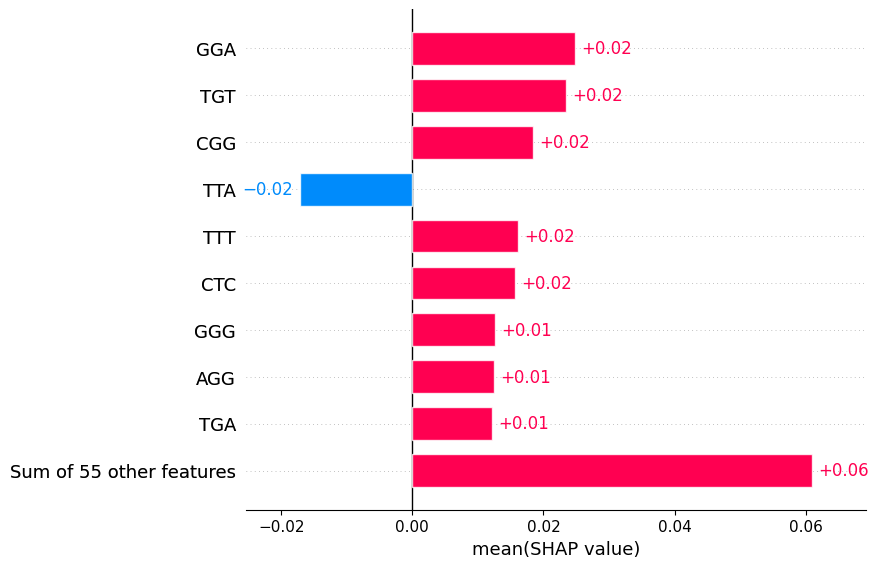

In [149]:
shap.plots.bar(shap_values_binary[:,:,"LABEL_0"].mean(0))

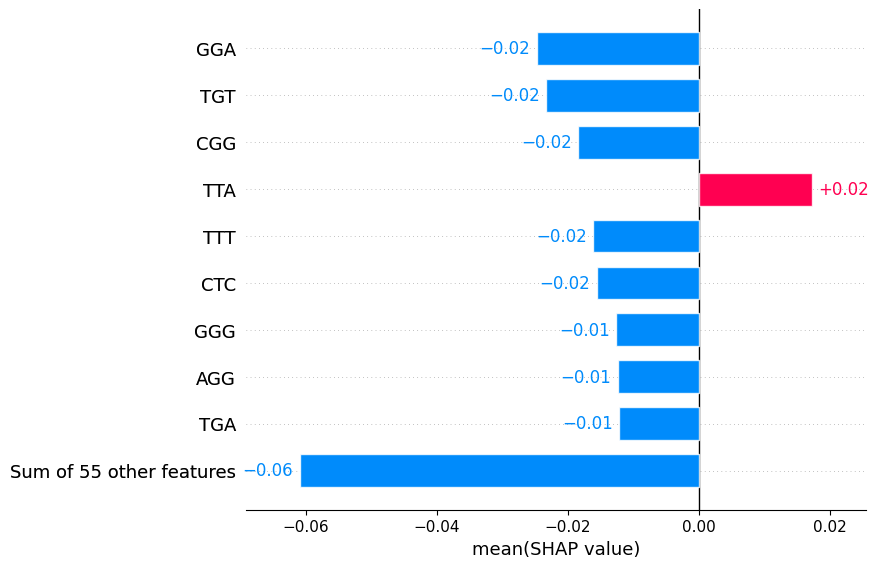

In [152]:
shap.plots.bar(shap_values_binary[:,:,"LABEL_1"].mean(0))

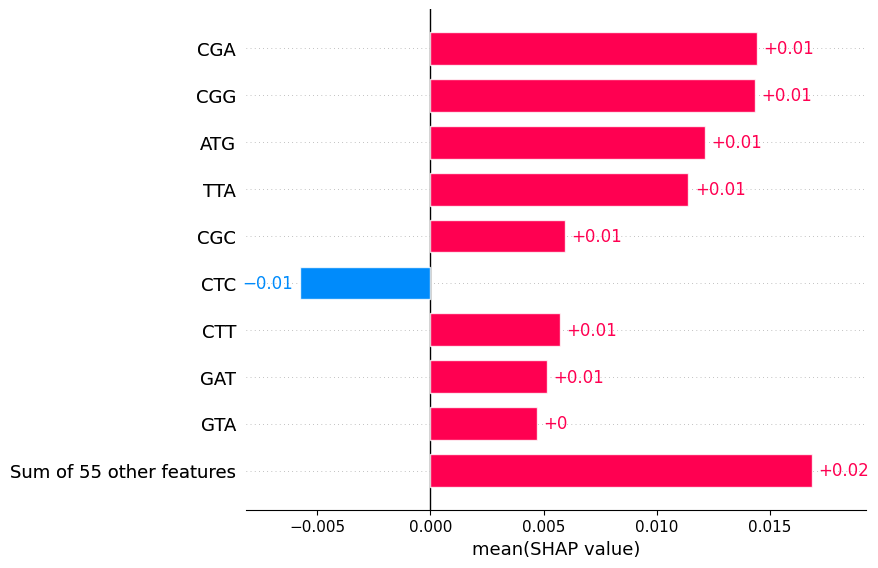

In [153]:
shap.plots.bar(shap_values_multi[:,:,"LABEL_0"].mean(0))

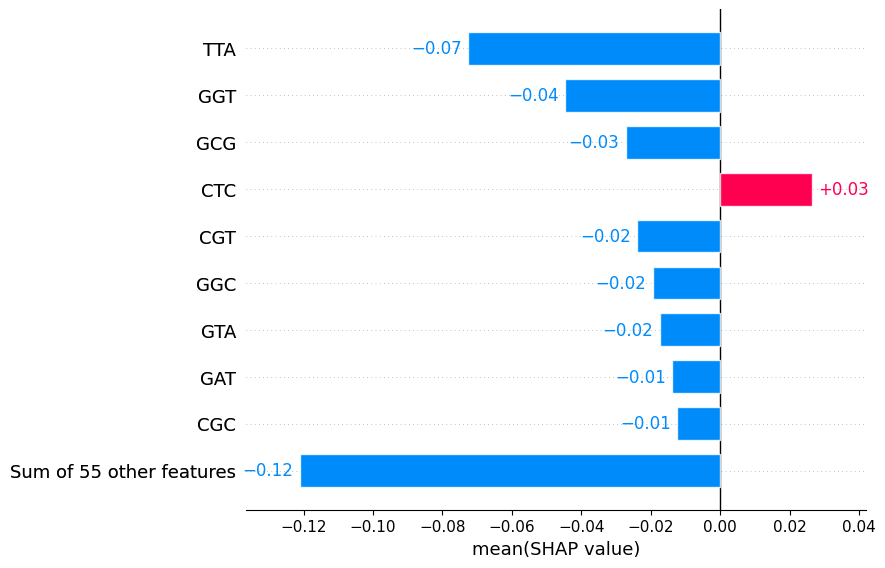

In [155]:
shap.plots.bar(shap_values_multi[:,:,"LABEL_1"].mean(0))

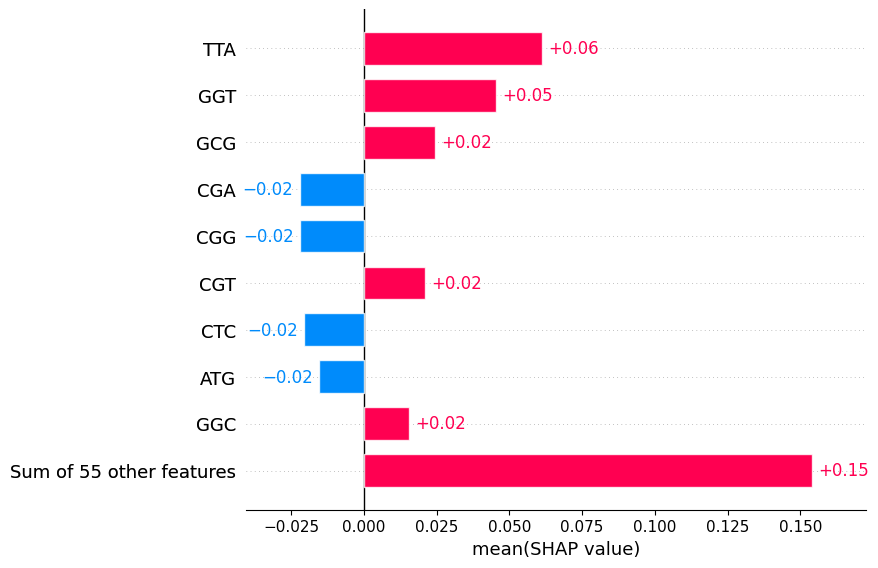

In [156]:
shap.plots.bar(shap_values_multi[:,:,"LABEL_2"].mean(0))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


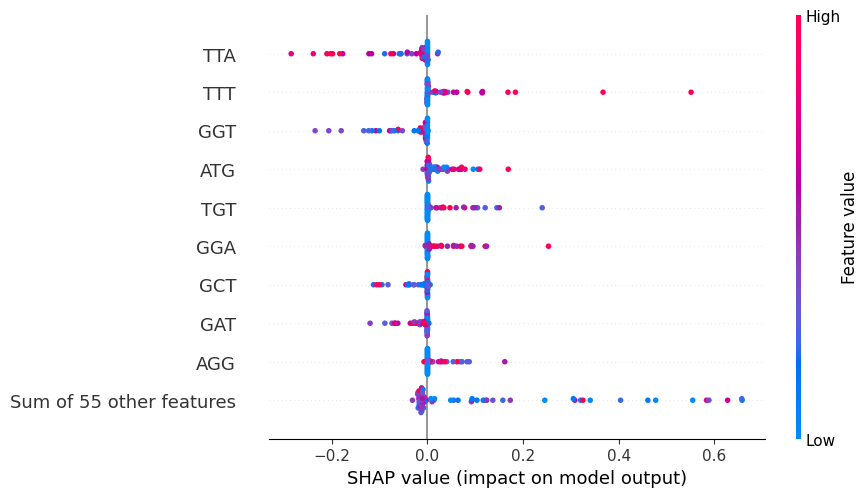

In [159]:
shap.plots.beeswarm(fix_shapley(shap_values_binary[:,:,0]))

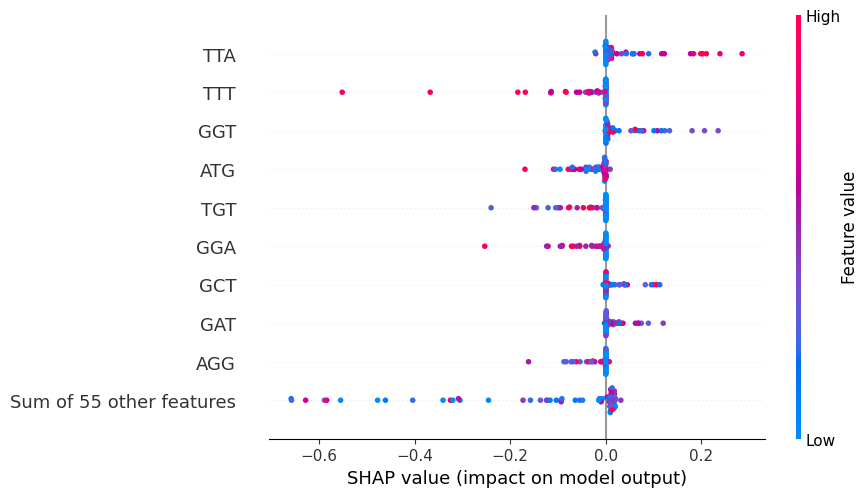

In [165]:
shap.plots.beeswarm(fix_shapley(shap_values_binary[:,:,1]))

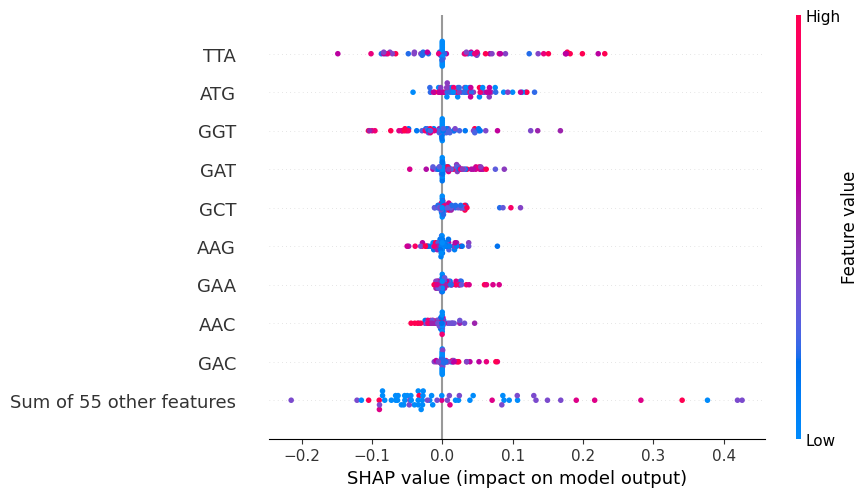

In [166]:
shap.plots.beeswarm(fix_shapley(shap_values_multi[:,:,0]))

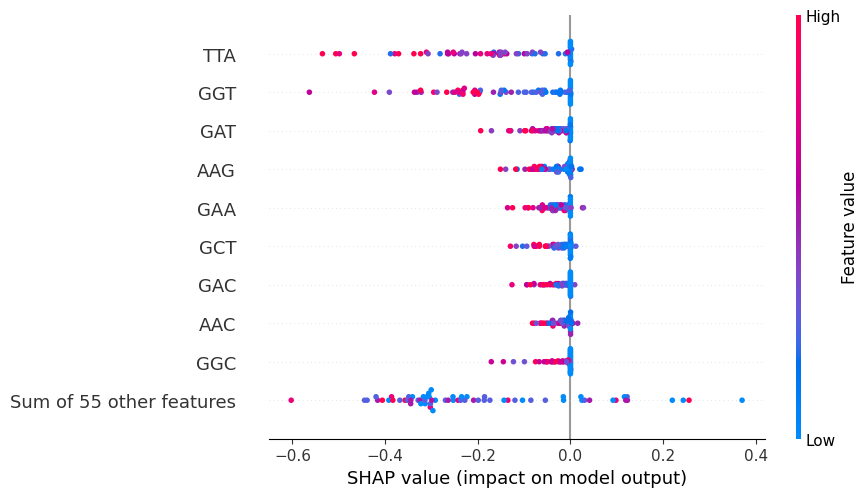

In [167]:
shap.plots.beeswarm(fix_shapley(shap_values_multi[:,:,1]))

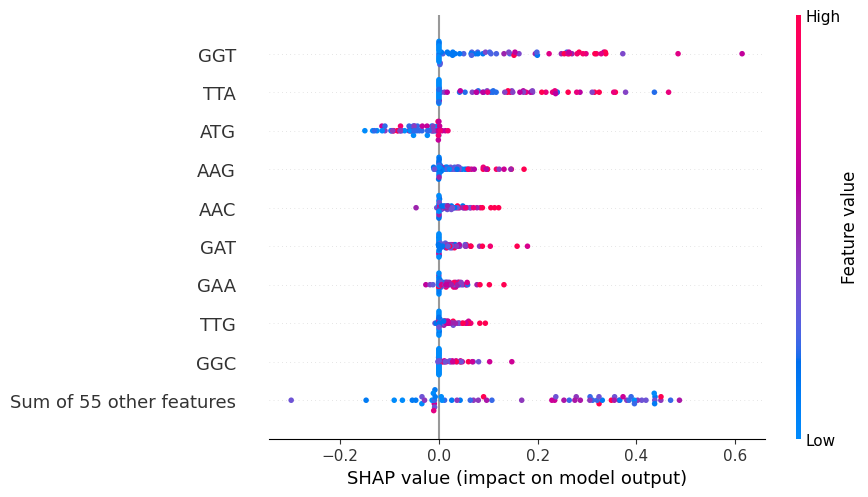

In [164]:
shap.plots.beeswarm(fix_shapley(shap_values_multi[:,:,2]))

In [109]:
def score_and_visualize(texts, pipe):
    prediction = pipe([texts])
    print(prediction[0])

    explainer = shap.Explainer(pipe)
    shap_values = explainer([texts])

    #print(shap_values[0,:,"LABEL_0"])
    #shap.plots.text(shap_values)
    #shap.plots.beeswarm(shap_values[:,:,1])
    shap.plots.bar(shap_values[0,:,"LABEL_1"])
    #shap.plots.bar(shap_values.mean(0))

[{'label': 'LABEL_0', 'score': 0.17227013409137726}, {'label': 'LABEL_1', 'score': 0.8277298808097839}]


  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer: 2it [00:11, 11.62s/it]                                                                                                                              


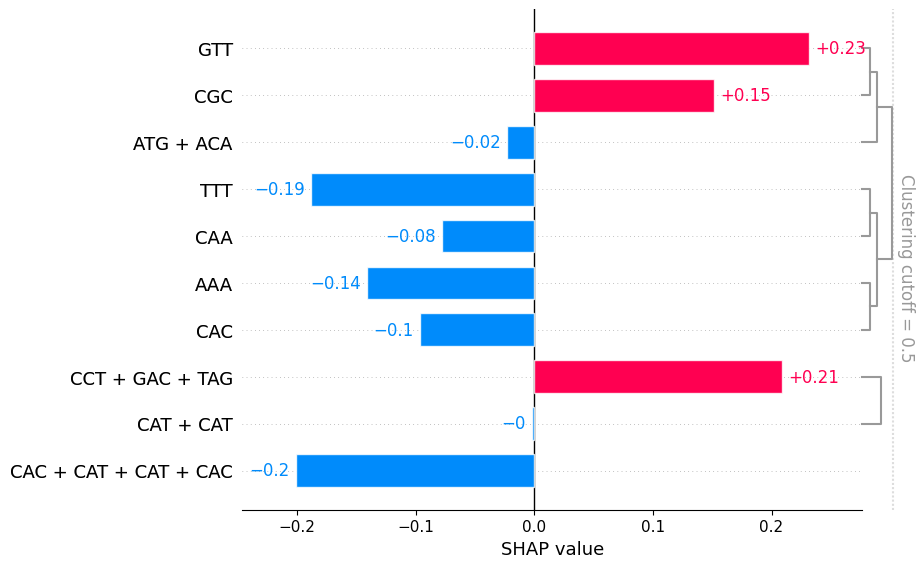

In [97]:
#positive
score_and_visualize('ATG ACA CGC GTT CAA TTT AAA CAC CAC CAT CAT CAC CAT CAT CCT GAC TAG', pipe_binary)

[{'label': 'LABEL_0', 'score': 0.9803666472434998}, {'label': 'LABEL_1', 'score': 0.019633324816823006}]


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.91s/it]                                                                                                                              


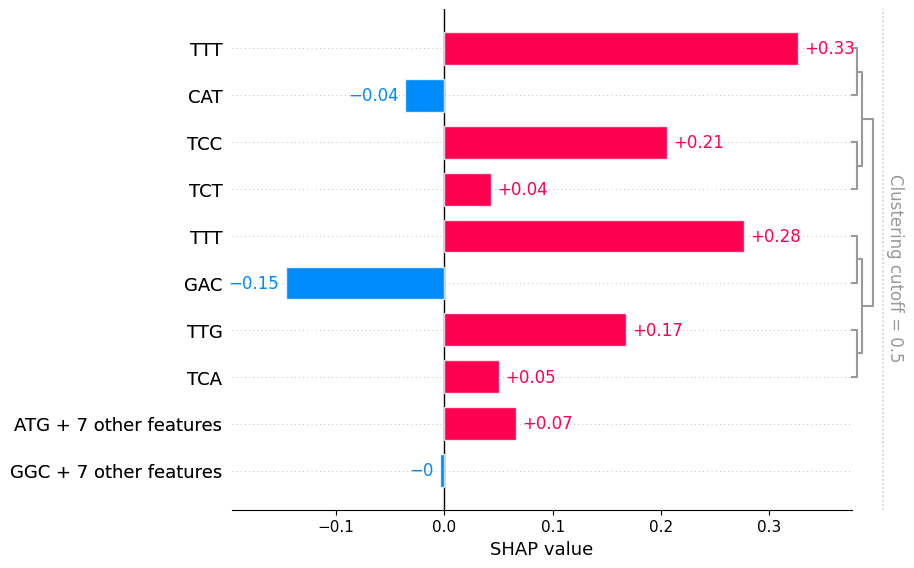

In [99]:
#negative
score_and_visualize('ATG CCA GTC AAC AGC GTC CTT TGC CAT TTT TCT TCC GAC TTT TCA TTG GGC CTC ATA TTG CAA GAT ATC TAA', pipe_binary)

[{'label': 'LABEL_0', 'score': 0.7687851190567017}, {'label': 'LABEL_1', 'score': 0.1905916929244995}, {'label': 'LABEL_2', 'score': 0.04062318429350853}]


  0%|          | 0/272 [00:00<?, ?it/s]

Partition explainer: 2it [00:11, 11.73s/it]                                                                                                                              


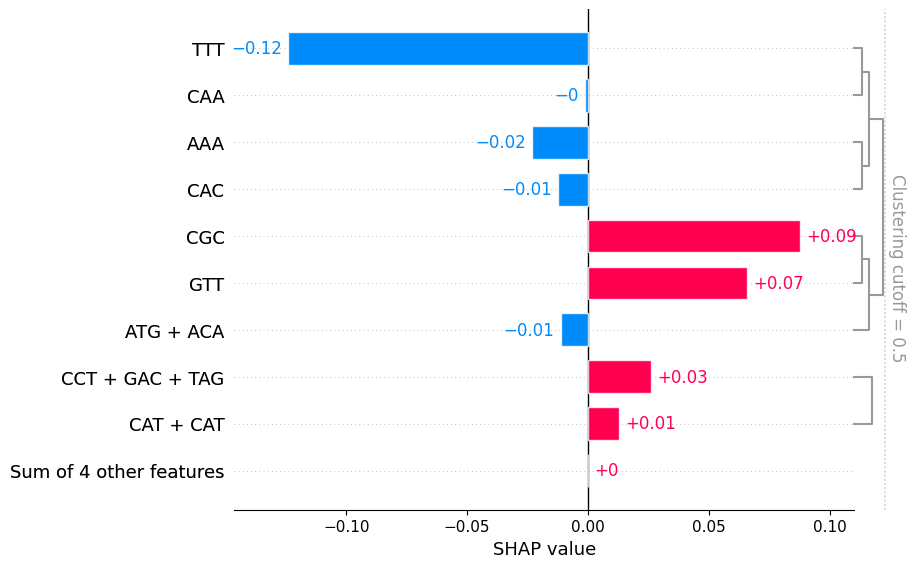

In [101]:
#positive
score_and_visualize('ATG ACA CGC GTT CAA TTT AAA CAC CAC CAT CAT CAC CAT CAT CCT GAC TAG', pipe_multi)

[{'label': 'LABEL_0', 'score': 0.11873134225606918}, {'label': 'LABEL_1', 'score': 0.875779926776886}, {'label': 'LABEL_2', 'score': 0.005488759838044643}]


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:33, 33.95s/it]                                                                                                                              


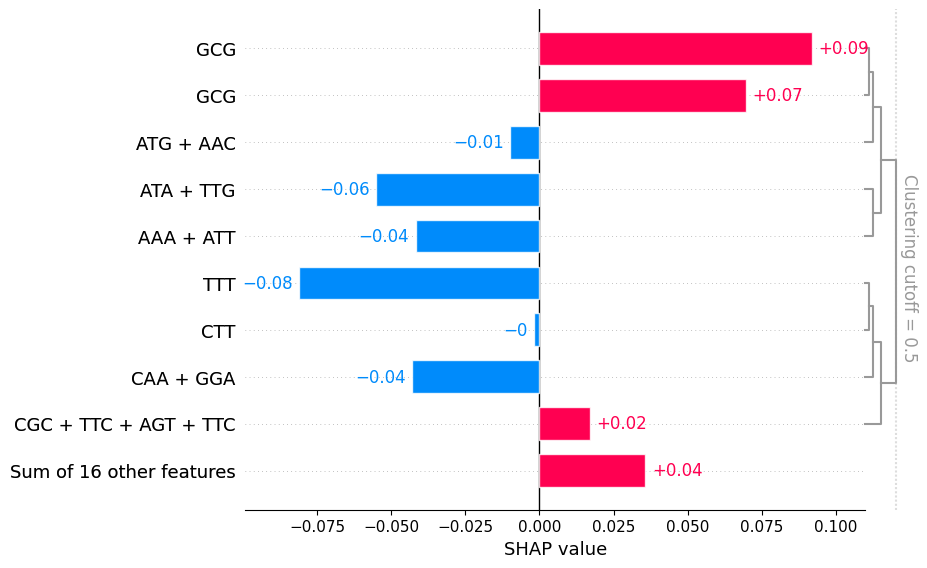

In [108]:
#neutral low
score_and_visualize('ATG AAC GCG GCG ATA TTG AAA ATT CGC TTC AGT TTC CAA GGA TTT CTT GAA AGA GAT TAGATG TGC CGT CGA GAG AGG TGG TTG GTA CGG TAG', pipe_multi)

[{'label': 'LABEL_0', 'score': 0.23782610893249512}, {'label': 'LABEL_1', 'score': 0.23719055950641632}, {'label': 'LABEL_2', 'score': 0.5249833464622498}]


  0%|          | 0/156 [00:00<?, ?it/s]

Partition explainer: 2it [00:10, 10.34s/it]                                                                                                                              


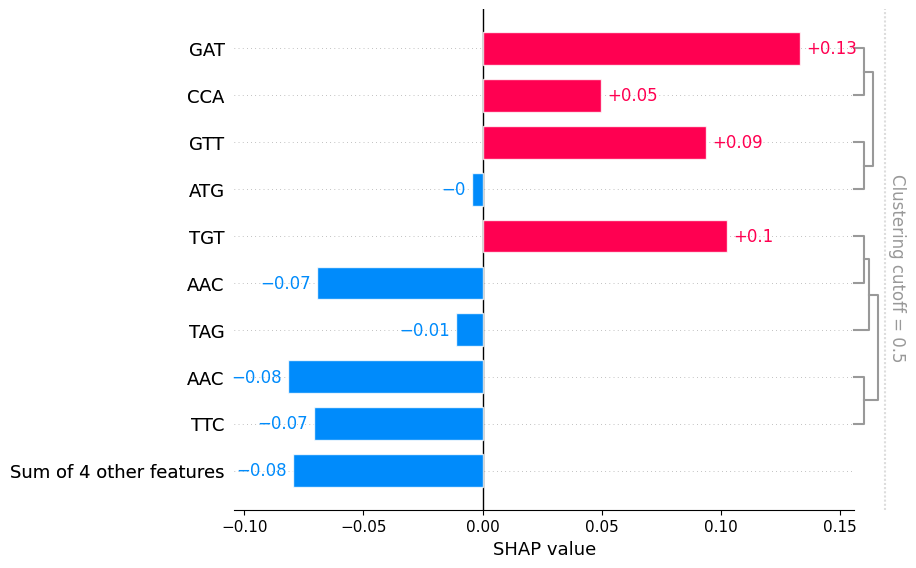

In [107]:
#neutral med
score_and_visualize('ATG GTT GAT CCA TAC TGG ATG GCA AAC TTC AAC TGT TAG', pipe_multi)

[{'label': 'LABEL_0', 'score': 0.024079488590359688}, {'label': 'LABEL_1', 'score': 0.9744369387626648}, {'label': 'LABEL_2', 'score': 0.0014836207265034318}]


  0%|          | 0/182 [00:00<?, ?it/s]

Partition explainer: 2it [00:11, 11.88s/it]                                                                                                                              


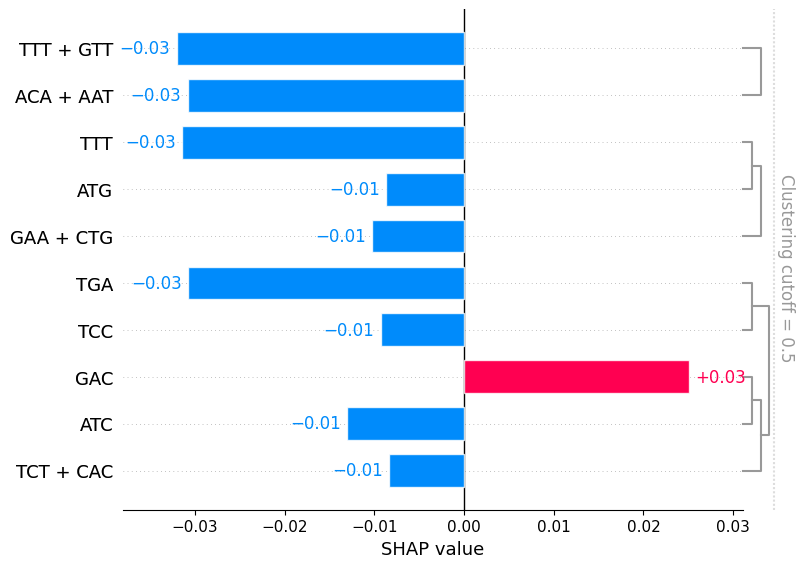

In [106]:
#neutral high
score_and_visualize('ATG TTT GAA CTG TTT GTT ACA AAT GAC ATC TCT CAC TCC TGA', pipe_multi)

[{'label': 'LABEL_0', 'score': 0.025431424379348755}, {'label': 'LABEL_1', 'score': 0.9726666808128357}, {'label': 'LABEL_2', 'score': 0.0019019738538190722}]


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:26, 26.08s/it]                                                                                                                              


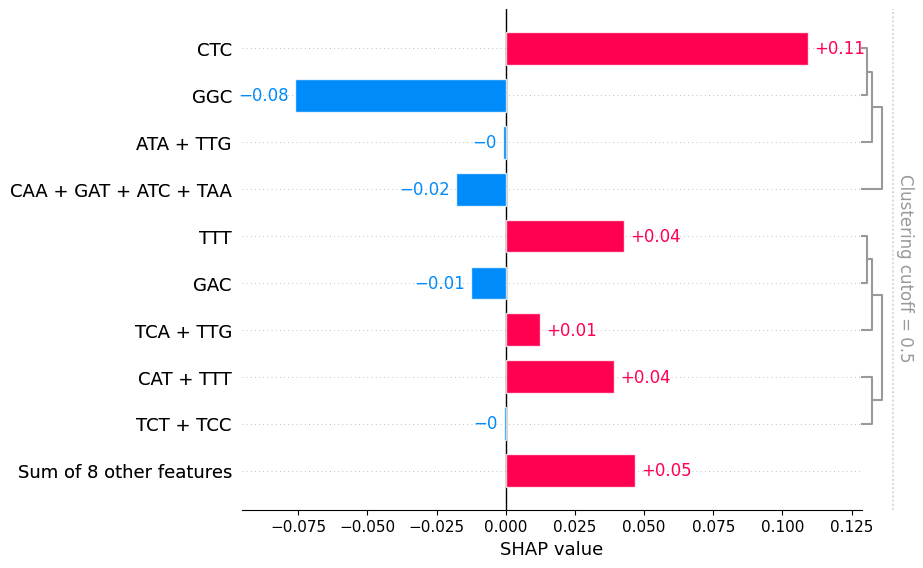

In [111]:
#negative
score_and_visualize('ATG CCA GTC AAC AGC GTC CTT TGC CAT TTT TCT TCC GAC TTT TCA TTG GGC CTC ATA TTG CAA GAT ATC TAA', pipe_multi)